<b> Data Vocabulary of Features taken to analysis:

"rooms" - quantity of rooms

"price" - price in hryvnas

"flat_area" - area of a flat in square meters

"prestigious" - code of districts:
code_prestigious = {'Печерський': 3,
                'Шевченківський': 3,
                'Голосіївський': 3,
                'Подільський': 2,
                'Святошинський': 1,
                'Солом\'янський': 2,
                'Оболонський': 2,
                'Дніпровський': 1,
                'Дарницький': 1,
                'Деснянський': 1}

code of flat types:
"code_type" = {'Дизайнерський ремонт': 5,
                'Євроремонт': 4,
                'Чудовий стан': 4,
                'Хороший стан': 3,
                'Задовільний стан': 1,
                'Перша здача': 2,
                'Потрібен капітальний ремонт': 1,
                'Незавершений ремонт': 1,
                'Потрібен косметичний ремонт': 1,
                'Від будівельників вільне планування': 1,
                 'Незавершений ремонт': 1}

codes of distances to metro: 1 - closer than 2 km, 2 - from 2 to 5 km, 3 - more than 5 km

<b>Results: 
    
Logariphm increased score in LinearRegression but made the problems with small prices. The predicts are incredible small. 
It also negatively influenced RandomForest making predicted prices too small.



In [119]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.covariance import EllipticEnvelope
import numpy as np
import math

df = pd.read_csv('all_flats_metro.csv')

C:\Users\liman\AppData\Local\Temp\ipykernel_16124\1790300445.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price']);


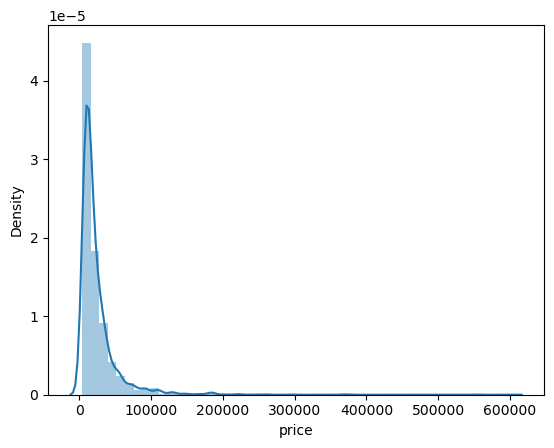

In [120]:
import seaborn as sns

sns.distplot(df['price']);

In [121]:
df["price"] = [np.log(x) for x in df["price"]]
df

,link,rooms,price,flat_area,premium,district,address,latitude,longitude,subway,...,type_of_house,type_of_rooms,type_of_condition,Unnamed: 14,prestigious,code type,closest_subway,subway_location,distance_to_subway,distance_category
0,https://rieltor.ua/flats-rent/view/10834307/,2.0,10.106428,109.0,ПРЕМІУМ,Дарницький,"Зарічна вул., 1-Б",50.395950,30.599648,NaN,...,Українська цегла,Роздільне,Дизайнерський ремонт,NaN,1,5,Славутич,"50.394167, 30.604167",0.376771,1
1,https://rieltor.ua/flats-rent/view/10832872/,2.0,10.106428,112.0,ПРЕМІУМ,Дарницький,"Зарічна вул., 1б",50.395950,30.599648,NaN,...,Українська цегла,Кухня-вітальня,Дизайнерський ремонт,NaN,1,5,Славутич,"50.394167, 30.604167",0.376771,1
2,https://rieltor.ua/flats-rent/view/10725408/,2.0,9.998798,94.0,ПРЕМІУМ,Печерський,"Лесі Українки бульв., 17",50.429684,30.536922,NaN,...,Стара цегла,Роздільне,Євроремонт,NaN,3,4,Печерська,"50.4275, 30.538889",0.279936,1
3,https://rieltor.ua/flats-rent/view/10766471/,2.0,9.998798,82.0,ПРЕМІУМ,Печерський,"Лесі Українки бульв., 17",50.429684,30.536922,NaN,...,None,Роздільне,Дизайнерський ремонт,NaN,3,5,Печерська,"50.4275, 30.538889",0.279936,1
4,https://rieltor.ua/flats-rent/view/10832868/,3.0,10.922515,161.0,ПРЕМІУМ,Печерський,"Предславинська вул., 42",50.415512,30.525202,Либідська,...,Українська цегла,Роздільне,Євроремонт,NaN,3,4,"Палац ""Україна""","50.420833, 30.520833",0.667737,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6015,https://rieltor.ua/flats-rent/view/10803998/,1.0,9.159047,64.0,no,Святошинський,"Кіпріанова академіка вул., 6А",50.438808,30.379671,NaN,...,None,Роздільне,Євроремонт,NaN,1,4,Житомирська,"50.456175, 30.365628",2.172046,2
6016,https://rieltor.ua/flats-rent/view/9615917/,2.0,8.699515,55.0,no,Шевченківський,"Данила Щербаківського вул. (Щербакова), 54",50.460178,30.402700,NaN,...,Українська цегла,Роздільне,Хороший стан,NaN,3,3,Нивки,"50.458653, 30.404042",0.194392,1
6017,https://rieltor.ua/flats-rent/view/10055853/,1.0,9.104980,89.0,no,Святошинський,"Стуса Василя вул., 28а",NaN,NaN,NaN,...,Типова панель,Роздільне,Задовільний стан,NaN,1,1,NaN,NaN,0.000000,1
6018,https://rieltor.ua/flats-rent/view/10548982/,2.0,8.853665,80.5,no,Дніпровський,"Гродненська вул., 3/5",NaN,NaN,NaN,...,Стара цегла,Суміжно-роздільна,Чудовий стан,NaN,1,4,NaN,NaN,0.000000,1


C:\Users\liman\AppData\Local\Temp\ipykernel_16124\211699023.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price']);


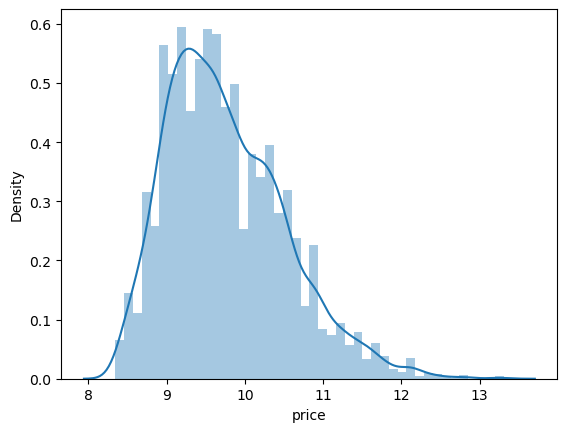

In [122]:

sns.distplot(df['price']);

In [123]:
#Linear regression

df['flat_area'] = df['flat_area'].astype(int)
df['price'] = df['price'].astype(int)
df['rooms'] = df['rooms'].astype(int)

# print(df.head(5))

label_encoder = LabelEncoder()
df['region_name_encoded'] = label_encoder.fit_transform(df['district'])

X = df[['flat_area', 'rooms', 'distance_category', 'code type', 'prestigious']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred_train=model.predict(X_train)
mse_y_train_y_pred=mean_squared_error(y_train, y_pred_train)
rmse_y_train_y_pred=np.sqrt(mean_squared_error(y_train, y_pred_train))

y_pred_test = model.predict(X_test)
mse_y_test_y_pred = mean_squared_error(y_test, y_pred_test)
rmse_y_test_y_pred=np.sqrt(mean_squared_error(y_test, y_pred_test))

score_train = model.score(X_train, y_train)
score_test = model.score(X_test, y_test)

print('Train score:', score_train)
print('Test score:', score_test)

print('Mean Squared Error (MSE) for mse_y_train_y_pred:', mse_y_train_y_pred)
print('Root Mean Squared Error (RMSE) for mse_y_train_y_pred:', rmse_y_train_y_pred)
print('Mean Squared Error (MSE) for mse_y_test_y_pred:', mse_y_train_y_pred)
print('Root Mean Squared Error (RMSE) for mse_y_test_y_pred:', rmse_y_train_y_pred)

print('Model cofficients:', model.coef_)

Train score: 0.6651813800244155
Test score: 0.6499619147354297
Mean Squared Error (MSE) for mse_y_train_y_pred: 0.22878763613843756
Root Mean Squared Error (RMSE) for mse_y_train_y_pred: 0.4783175055738997
Mean Squared Error (MSE) for mse_y_test_y_pred: 0.22878763613843756
Root Mean Squared Error (RMSE) for mse_y_test_y_pred: 0.4783175055738997
Model cofficients: [ 0.00474055  0.0140835  -0.22156963  0.27175246  0.25135738]


In [124]:
# Оцінка кoефіцієнтів
df_coef = pd.DataFrame(model.coef_, X.columns, columns=['Model coefficients'])
df_coef

,Model coefficients
flat_area,0.004741
rooms,0.014084
distance_category,-0.221570
code type,0.271752
prestigious,0.251357


In [125]:
#Prediction
price_pred = math.exp(model.predict([[40, 1, 1, 4, 3]])) # 40 sqmeters, 1 room, close to metro, good state of flat, prestigious district
print("Price for 40 sqmeters, 1 room, close to metro, Хороший стан of flat, prestigious district:", price_pred, "hryvnas")

Price for 40 sqmeters, 1 room, close to metro, Хороший стан of flat, prestigious district: 9692.521355324323 hryvnas


C:\Users\liman\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [126]:
#Prediction
price_pred = math.exp(model.predict([[60, 2, 1, 5, 3]])) # 40 sqmeters, 1 room, close to metro, good state of flat, prestigious district
print("Price for 60 sqmeters, 2 rooms, close to metro, Євроремонт state of flat, prestigious district:", price_pred, "hryvnas")

Price for 60 sqmeters, 2 rooms, close to metro, Євроремонт state of flat, prestigious district: 14182.397218018306 hryvnas


C:\Users\liman\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [127]:
#Prediction
price_pred = math.exp(model.predict([[40, 1, 1, 4, 1]])) # 40 sqmeters, 1 room, close to metro, good state of flat, prestigious district
print("Price for 40 sqmeters, 1 room, close to metro, Хороший стан of flat, not prestigious district:", price_pred, "hryvnas")

Price for 40 sqmeters, 1 room, close to metro, Хороший стан of flat, not prestigious district: 5862.873443355201 hryvnas


C:\Users\liman\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [128]:
#Prediction
price_pred = math.exp(model.predict([[160, 4, 3, 5, 3]])) # 40 sqmeters, 1 room, close to metro, good state of flat, prestigious district
print("Price for 160 sqmeters, 4 rooms, distant from metro, Дизайнерський ремонт of flat, prestigious district:", price_pred, "hryvnas")

Price for 160 sqmeters, 4 rooms, distant from metro, Дизайнерський ремонт of flat, prestigious district: 15045.580801091293 hryvnas


C:\Users\liman\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [129]:
#Prediction
price_pred = math.exp(model.predict([[40, 1, 1, 1, 1]])) # 40 sqmeters, 1 room, close to metro, good state of flat, prestigious district
print("Price for 40 sqmeters, 1 room, close to metro, Потрібен капітальний ремонт,prestigious district 1:", price_pred, "hryvnas")

Price for 40 sqmeters, 1 room, close to metro, Потрібен капітальний ремонт,prestigious district 1: 2594.4704805126767 hryvnas


C:\Users\liman\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [130]:
#Lasso of the model

from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=1)

lasso_model.fit(X_train, y_train)


Lasso(alpha=1)

In [131]:
y_pred_train=lasso_model.predict(X_train)
lasso_mse_y_train_y_pred=mean_squared_error(y_train, y_pred_train)
lasso_rmse_y_train_y_pred=np.sqrt(mean_squared_error(y_train, y_pred_train))

lasso_y_pred_test = lasso_model.predict(X_test)
lasso_mse_y_test_y_pred = mean_squared_error(y_test, y_pred_test)
lasso_rmse_y_test_y_pred=np.sqrt(mean_squared_error(y_test, y_pred_test))

lasso_score_train = lasso_model.score(X_train, y_train)
lasso_score_test = lasso_model.score(X_test, y_test)

print('Train score for lasso_model:', lasso_score_train)
print('Test score for lasso_model:', lasso_score_test)

print('Mean Squared Error (MSE) for lasso_mse_y_train_y_pred:', lasso_mse_y_train_y_pred)
print('Root Mean Squared Error (RMSE) for lasso_mse_y_train_y_pred:', lasso_rmse_y_train_y_pred)
print('Mean Squared Error (MSE) for lasso_mse_y_test_y_pred:', lasso_mse_y_train_y_pred)
print('Root Mean Squared Error (RMSE) for lasso_mse_y_test_y_pred:', lasso_rmse_y_train_y_pred)

print('Model cofficients:', lasso_model.coef_)

Train score for lasso_model: 0.44681230553925166
Test score for lasso_model: 0.43471705498492985
Mean Squared Error (MSE) for lasso_mse_y_train_y_pred: 0.37800318562263957
Root Mean Squared Error (RMSE) for lasso_mse_y_train_y_pred: 0.6148196366599229
Mean Squared Error (MSE) for lasso_mse_y_test_y_pred: 0.37800318562263957
Root Mean Squared Error (RMSE) for lasso_mse_y_test_y_pred: 0.6148196366599229
Model cofficients: [ 0.0066802  0.        -0.         0.         0.       ]


In [132]:
# Оцінка кoефіцієнтів
lasso_df_coef = pd.DataFrame(lasso_model.coef_, X.columns, columns=['Model coefficients'])
lasso_df_coef

,Model coefficients
flat_area,0.00668
rooms,0.00000
distance_category,-0.00000
code type,0.00000
prestigious,0.00000


In [133]:
#Prediction
price_pred = math.exp(lasso_model.predict([[40, 1, 1, 4, 3]])) # 40 sqmeters, 1 room, close to metro, good state of flat, prestigious district
print("Price for 40 sqmeters, 1 room, close to metro, Хороший стан of flat, prestigious district:", price_pred, "hryvnas")

Price for 40 sqmeters, 1 room, close to metro, Хороший стан of flat, prestigious district: 5835.117226496792 hryvnas


C:\Users\liman\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


In [134]:
#Prediction
price_pred = math.exp(lasso_model.predict([[40, 1, 1, 4, 1]])) # 40 sqmeters, 1 room, close to metro, good state of flat, prestigious district
print("Price for 40 sqmeters, 1 room, close to metro, Хороший стан of flat, not prestigious district:", price_pred, "hryvnas")

Price for 40 sqmeters, 1 room, close to metro, Хороший стан of flat, not prestigious district: 5835.117226496792 hryvnas


C:\Users\liman\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


In [135]:
#Prediction
price_pred = math.exp(model.predict([[40, 1, 1, 1, 1]])) # 40 sqmeters, 1 room, close to metro, good state of flat, prestigious district
print("Price for 40 sqmeters, 1 room, close to metro, Потрібен капітальний ремонт,prestigious district 1:", price_pred, "hryvnas")

Price for 40 sqmeters, 1 room, close to metro, Потрібен капітальний ремонт,prestigious district 1: 2594.4704805126767 hryvnas


C:\Users\liman\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [136]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1)

ridge_model.fit(X_train, y_train)


Ridge(alpha=1)

In [137]:
y_pred_train=ridge_model.predict(X_train)
ridge_mse_y_train_y_pred=mean_squared_error(y_train, y_pred_train)
ridge_rmse_y_train_y_pred=np.sqrt(mean_squared_error(y_train, y_pred_train))

ridge_y_pred_test = ridge_model.predict(X_test)
ridge_mse_y_test_y_pred = mean_squared_error(y_test, y_pred_test)
ridge_rmse_y_test_y_pred=np.sqrt(mean_squared_error(y_test, y_pred_test))

ridge_score_train = ridge_model.score(X_train, y_train)
ridge_score_test = ridge_model.score(X_test, y_test)

print('Train score for ridge_model:', ridge_score_train)
print('Test score for ridge_model:', ridge_score_test)

print('Mean Squared Error (MSE) for ridge_mse_y_train_y_pred:', ridge_mse_y_train_y_pred)
print('Root Mean Squared Error (RMSE) for ridge_mse_y_train_y_pred:', ridge_rmse_y_train_y_pred)
print('Mean Squared Error (MSE) for ridge_mse_y_test_y_pred:', ridge_mse_y_train_y_pred)
print('Root Mean Squared Error (RMSE) for ridge_mse_y_test_y_pred:', ridge_rmse_y_train_y_pred)

print('Model cofficients:', ridge_model.coef_)

Train score for ridge_model: 0.6651813593360858
Test score for ridge_model: 0.6499605267214746
Mean Squared Error (MSE) for ridge_mse_y_train_y_pred: 0.2287876502751485
Root Mean Squared Error (RMSE) for ridge_mse_y_train_y_pred: 0.4783175203514382
Mean Squared Error (MSE) for ridge_mse_y_test_y_pred: 0.2287876502751485
Root Mean Squared Error (RMSE) for ridge_mse_y_test_y_pred: 0.4783175203514382
Model cofficients: [ 0.00474116  0.01407581 -0.22139962  0.27169999  0.25131033]


In [138]:
# Оцінка кoефіцієнтів
ridge_df_coef = pd.DataFrame(ridge_model.coef_, X.columns, columns=['Model coefficients'])
ridge_df_coef

,Model coefficients
flat_area,0.004741
rooms,0.014076
distance_category,-0.221400
code type,0.271700
prestigious,0.251310


In [139]:
#Prediction
price_pred = math.exp(ridge_model.predict([[40, 1, 1, 4, 3]])) # 40 sqmeters, 1 room, close to metro, good state of flat, prestigious district
print("Price for 40 sqmeters, 1 room, close to metro, Хороший стан of flat, prestigious district:", price_pred, "hryvnas")

Price for 40 sqmeters, 1 room, close to metro, Хороший стан of flat, prestigious district: 9691.142536378386 hryvnas


C:\Users\liman\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


In [140]:
#Prediction
price_pred = math.exp(model.predict([[40, 1, 1, 1, 1]])) # 40 sqmeters, 1 room, close to metro, good state of flat, prestigious district
print("Price for 40 sqmeters, 1 room, close to metro, Потрібен капітальний ремонт,prestigious district 1:", price_pred, "hryvnas")

Price for 40 sqmeters, 1 room, close to metro, Потрібен капітальний ремонт,prestigious district 1: 2594.4704805126767 hryvnas


C:\Users\liman\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [141]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
# I added max_depth param = 4
regressor = DecisionTreeRegressor(max_depth=4)

regressor.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=4)

In [142]:
regressor_y_pred_train=regressor.predict(X_train)
regressor_mse_y_train_y_pred=mean_squared_error(y_train, y_pred_train)
regressor_rmse_y_train_y_pred=np.sqrt(mean_squared_error(y_train, y_pred_train))

regressor_y_pred_test = regressor.predict(X_test)
regressor_mse_y_test_y_pred = mean_squared_error(y_test, y_pred_test)
regressor_rmse_y_test_y_pred=np.sqrt(mean_squared_error(y_test, y_pred_test))

train_score = regressor.score(X_train, y_train)
print("Training R2 Score for X_train, y_train:", train_score)

test_score = regressor.score(X_test, y_test)
print("Test R2 Score for X_test, y_test:", test_score)

print('Mean Squared Error (MSE) for regressor_mse_y_train_y_pred:', regressor_mse_y_train_y_pred)
print('Root Mean Squared Error (RMSE) for regressor_mse_y_train_y_pred:', regressor_rmse_y_train_y_pred)
print('Mean Squared Error (MSE) for regressor_mse_y_test_y_pred:', regressor_mse_y_train_y_pred)
print('Root Mean Squared Error (RMSE) for regressor_mse_y_test_y_pred:', regressor_rmse_y_train_y_pred)

print('Model feature importances:', regressor.feature_importances_) 

# Perform 5-fold cross-validation on the training data
scores = cross_val_score(regressor, X_train, y_train, cv=5, scoring='r2')

print("Cross-validated R2 scores:", scores)
print("Mean R2 score:", scores.mean())

Training R2 Score for X_train, y_train: 0.642212369147785
Test R2 Score for X_test, y_test: 0.6031523558062337
Mean Squared Error (MSE) for regressor_mse_y_train_y_pred: 0.2287876502751485
Root Mean Squared Error (RMSE) for regressor_mse_y_train_y_pred: 0.4783175203514382
Mean Squared Error (MSE) for regressor_mse_y_test_y_pred: 0.2287876502751485
Root Mean Squared Error (RMSE) for regressor_mse_y_test_y_pred: 0.4783175203514382
Model feature importances: [0.67425278 0.         0.         0.24170782 0.08403939]
Cross-validated R2 scores: [0.65149309 0.63634117 0.60313818 0.59121793 0.61956684]
Mean R2 score: 0.6203514399205513


In [143]:
# Оцінка кoефіцієнтів
regr_df_imp = pd.DataFrame(regressor.feature_importances_, X.columns, columns=['Feature Importances'])
regr_df_imp

,Feature Importances
flat_area,0.674253
rooms,0.000000
distance_category,0.000000
code type,0.241708
prestigious,0.084039


In [144]:
#Prediction
price_pred = math.exp(regressor.predict([[40, 1, 1, 4, 3]])) # 40 sqmeters, 1 room, close to metro, good state of flat, prestigious district
print("Price for 40 sqmeters, 1 room, close to metro, Хороший стан of flat, prestigious district:", price_pred, "hryvnas")

Price for 40 sqmeters, 1 room, close to metro, Хороший стан of flat, prestigious district: 11565.043047938705 hryvnas


C:\Users\liman\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [145]:
#Prediction
price_pred = math.exp(regressor.predict([[60, 2, 1, 5, 3]])) # 40 sqmeters, 1 room, close to metro, good state of flat, prestigious district
print("Price for 60 sqmeters, 2 rooms, close to metro, Євроремонт state of flat, prestigious district:", price_pred, "hryvnas")

Price for 60 sqmeters, 2 rooms, close to metro, Євроремонт state of flat, prestigious district: 11274.234058744929 hryvnas


C:\Users\liman\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [146]:
#Prediction
price_pred = math.exp(regressor.predict([[40, 1, 1, 4, 1]])) # 40 sqmeters, 1 room, close to metro, good state of flat, prestigious district
print("Price for 40 sqmeters, 1 room, close to metro, Хороший стан of flat, not prestigious district:", price_pred, "hryvnas")

Price for 40 sqmeters, 1 room, close to metro, Хороший стан of flat, not prestigious district: 7821.830715980417 hryvnas


C:\Users\liman\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [147]:
#Prediction
price_pred = math.exp(regressor.predict([[160, 4, 3, 5, 3]])) # 40 sqmeters, 1 room, close to metro, good state of flat, prestigious district
print("Price for 160 sqmeters, 4 rooms, distant from metro, Дизайнерський ремонт of flat, prestigious district:", price_pred, "hryvnas")

Price for 160 sqmeters, 4 rooms, distant from metro, Дизайнерський ремонт of flat, prestigious district: 24862.28477307541 hryvnas


C:\Users\liman\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [148]:
#Prediction
price_pred = math.exp(regressor.predict([[40, 1, 1, 1, 1]])) # 40 sqmeters, 1 room, close to metro, good state of flat, prestigious district
print("Price for 40 sqmeters, 1 room, close to metro, Потрібен капітальний ремонт,prestigious district 1:", price_pred, "hryvnas")

Price for 40 sqmeters, 1 room, close to metro, Потрібен капітальний ремонт,prestigious district 1: 3462.678047555426 hryvnas


C:\Users\liman\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [149]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

regressor_forest = RandomForestRegressor(n_estimators=150, max_depth=12, min_samples_split=3, min_samples_leaf=2)

regressor_forest.fit(X_train, y_train)


RandomForestRegressor(max_depth=12, min_samples_leaf=2, min_samples_split=3,
                      n_estimators=150)

In [150]:
regressor_forest_y_pred_train=regressor_forest.predict(X_train)
regressor_forest_mse_y_train_y_pred=mean_squared_error(y_train, y_pred_train)
regressor_forest_rmse_y_train_y_pred=np.sqrt(mean_squared_error(y_train, y_pred_train))

regressor_forest_y_pred_test = regressor_forest.predict(X_test)
regressor_forest_mse_y_test_y_pred = mean_squared_error(y_test, y_pred_test)
regressor_forest_rmse_y_test_y_pred=np.sqrt(mean_squared_error(y_test, y_pred_test))

f_train_score = regressor_forest.score(X_train, y_train)
print("Training R2 Score for X_train, y_train:", f_train_score)

f_test_score = regressor_forest.score(X_test, y_test)
print("Test R2 Score for X_test, y_test:", f_test_score)

print('Mean Squared Error (MSE) for regressor_forest_mse_y_train_y_pred:', regressor_forest_mse_y_train_y_pred)
print('Root Mean Squared Error (RMSE) for regressor_forest_rmse_y_train_y_pred:', regressor_forest_rmse_y_train_y_pred)
print('Mean Squared Error (MSE) for regressor_forest_mse_y_test_y_pred:', regressor_forest_mse_y_train_y_pred)
print('Root Mean Squared Error (RMSE) for regressor_forest_rmse_y_test_y_pred:', regressor_forest_rmse_y_train_y_pred)

print('Model regressor_forest feature importances:', regressor_forest.feature_importances_) 

# Perform 5-fold cross-validation on the training data
scores = cross_val_score(regressor_forest, X_train, y_train, cv=5, scoring='r2')

print("Cross-validated R2 scores:", scores)
print("Mean R2 score:", scores.mean())

Training R2 Score for X_train, y_train: 0.8224561886350062
Test R2 Score for X_test, y_test: 0.675096600898679
Mean Squared Error (MSE) for regressor_forest_mse_y_train_y_pred: 0.2287876502751485
Root Mean Squared Error (RMSE) for regressor_forest_rmse_y_train_y_pred: 0.4783175203514382
Mean Squared Error (MSE) for regressor_forest_mse_y_test_y_pred: 0.2287876502751485
Root Mean Squared Error (RMSE) for regressor_forest_rmse_y_test_y_pred: 0.4783175203514382
Model regressor_forest feature importances: [0.63984493 0.02551532 0.02380619 0.21775717 0.09307639]
Cross-validated R2 scores: [0.69268868 0.68331623 0.68145235 0.67659828 0.69248507]
Mean R2 score: 0.6853081224979357


In [151]:
# Оцінка кoефіцієнтів
regrfor_df_imp = pd.DataFrame(regressor_forest.feature_importances_, X.columns, columns=['Feature Importances'])
regrfor_df_imp

,Feature Importances
flat_area,0.639845
rooms,0.025515
distance_category,0.023806
code type,0.217757
prestigious,0.093076


In [152]:
#Predictions
print(math.exp(regressor_forest.predict([[80, 2, 1, 1, 1]])))
#80 meters, 2 rooms, close to metro, Задовільний стан  state of flat, non-prestigious district
print(math.exp(regressor_forest.predict([[160, 3, 3, 5, 1]])))
#160 sqmeters, 3 rooms, distant from metro, Дизайнерський ремонт, non-prestigious district
print(math.exp(regressor_forest.predict([[100, 2, 3, 1, 1]])))
#100 sqmeters, 2 rooms, distant from metro,Потрібен капітальний ремонт, non-prestigious district 
print(math.exp(regressor_forest.predict([[50, 2, 2, 1, 1]])))
#50 sqmeters, 2 rooms, middle distance to metro, Потрібен капітальний ремонт, non-prestigious district 

4464.007560866441
16265.24194982694
3384.442397978159
2981.786145943765


C:\Users\liman\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\liman\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\liman\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\liman\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [153]:
#Prediction
price_pred = math.exp(regressor_forest.predict([[40, 1, 1, 4, 3]])) # 40 sqmeters, 1 room, close to metro, good state of flat, prestigious district
print("Price for 40 sqmeters, 1 room, close to metro, Хороший стан of flat, prestigious district:", price_pred, "hryvnas")

Price for 40 sqmeters, 1 room, close to metro, Хороший стан of flat, prestigious district: 8003.537327627792 hryvnas


C:\Users\liman\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [154]:
#Prediction
price_pred = math.exp(regressor_forest.predict([[60, 2, 1, 5, 3]])) # 40 sqmeters, 1 room, close to metro, good state of flat, prestigious district
print("Price for 60 sqmeters, 2 rooms, close to metro, Євроремонт state of flat, prestigious district:", price_pred, "hryvnas")

Price for 60 sqmeters, 2 rooms, close to metro, Євроремонт state of flat, prestigious district: 10867.756396611465 hryvnas


C:\Users\liman\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [155]:
#Prediction
price_pred = math.exp(regressor_forest.predict([[40, 1, 1, 4, 1]])) # 40 sqmeters, 1 room, close to metro, good state of flat, prestigious district
print("Price for 40 sqmeters, 1 room, close to metro, Хороший стан of flat, not prestigious district:", price_pred, "hryvnas")

Price for 40 sqmeters, 1 room, close to metro, Хороший стан of flat, not prestigious district: 7375.411967025024 hryvnas


C:\Users\liman\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [156]:
#Prediction
price_pred = math.exp(regressor_forest.predict([[160, 4, 3, 5, 3]])) # 40 sqmeters, 1 room, close to metro, good state of flat, prestigious district
print("Price for 160 sqmeters, 4 rooms, distant from metro, Дизайнерський ремонт of flat, prestigious district:", price_pred, "hryvnas")

C:\Users\liman\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Price for 160 sqmeters, 4 rooms, distant from metro, Дизайнерський ремонт of flat, prestigious district: 22209.781390911245 hryvnas


In [157]:
#Prediction
price_pred = math.exp(regressor_forest.predict([[40, 1, 3, 1, 1]])) # 40 sqmeters, 1 room, close to metro, good state of flat, prestigious district
print("Price for 40 sqmeters, 1 room, distant from metro, Потрібен капітальний ремонт, prestigious district 1:", price_pred, "hryvnas")

Price for 40 sqmeters, 1 room, distant from metro, Потрібен капітальний ремонт, prestigious district 1: 3209.024327881799 hryvnas


C:\Users\liman\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [158]:
from sklearn.svm import SVR

regressor = SVR()

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

score = regressor.score(X_test, y_test)
print("R2 Score:", score)

R2 Score: 0.5490656056920437


In [159]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

param_grid = {'fit_intercept': [True, False]}

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)  


best_params = grid_search.best_params_
best_model = LinearRegression(**best_params)
best_model.fit(X_train, y_train)  

# Print the evaluation metrics
print('Best Hyperparameters:', best_params)

Best Hyperparameters: {'fit_intercept': True}


In [160]:
best_model_y_pred_train = best_model.predict(X_train)
y_pred_train = best_model_y_pred_train
best_model_mse_y_train_y_pred = mean_squared_error(y_train, y_pred_train)
best_model_rmse_y_train_y_pred = np.sqrt(mean_squared_error(y_train, y_pred_train))

best_model_y_pred_test = best_model.predict(X_test)
y_pred_test = best_model_y_pred_test
best_model_mse_y_test_y_pred = mean_squared_error(y_test, y_pred_test)
best_model_rmse_y_test_y_pred = np.sqrt(mean_squared_error(y_test, y_pred_test))

gs_train_score = best_model.score(X_train, y_train)
print("Training  Score for X_train, y_train:", gs_train_score)

gs_test_score = best_model.score(X_test, y_test)
print("Test Score for X_test, y_test:", gs_test_score)

print('Mean Squared Error (MSE) for best_model_mse_y_train_y_pred:', best_model_mse_y_train_y_pred)
print('Root Mean Squared Error (RMSE) for best_model_rmse_y_train_y_pred:', best_model_rmse_y_train_y_pred)
print('Mean Squared Error (MSE) for best_model_y_test_y_pred:', best_model_mse_y_train_y_pred)
print('Root Mean Squared Error (RMSE) for best_model_rmse_y_test_y_pred:', best_model_rmse_y_train_y_pred)

print('Model best_model GridSearchCV coefficients:', best_model.coef_) 


Training  Score for X_train, y_train: 0.6649392508689709
Test Score for X_test, y_test: 0.6474039070361152
Mean Squared Error (MSE) for best_model_mse_y_train_y_pred: 0.22878124371055228
Root Mean Squared Error (RMSE) for best_model_rmse_y_train_y_pred: 0.47831082332574526
Mean Squared Error (MSE) for best_model_y_test_y_pred: 0.22878124371055228
Root Mean Squared Error (RMSE) for best_model_rmse_y_test_y_pred: 0.47831082332574526
Model best_model GridSearchCV coefficients: [ 0.00497217  0.00572837 -0.22955049  0.27744359  0.23887233]


In [161]:
# Оцінка кoефіцієнтів
df_coef = pd.DataFrame(best_model.coef_, X.columns, columns=['Model coefficients'])
df_coef

,Model coefficients
flat_area,0.004972
rooms,0.005728
distance_category,-0.229550
code type,0.277444
prestigious,0.238872


In [162]:
#Prediction
price_pred = math.exp(best_model.predict([[40, 1, 1, 4, 3]])) # 40 sqmeters, 1 room, close to metro, good state of flat, prestigious district
print("Price for 40 sqmeters, 1 room, close to metro, Хороший стан of flat, prestigious district:", price_pred, "hryvnas")


Price for 40 sqmeters, 1 room, close to metro, Хороший стан of flat, prestigious district: 9535.912827922682 hryvnas


C:\Users\liman\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [163]:
#Prediction
price_pred = math.exp(best_model.predict([[60, 2, 1, 5, 3]])) # 40 sqmeters, 1 room, close to metro, good state of flat, prestigious district
print("Price for 60 sqmeters, 2 rooms, close to metro, Євроремонт state of flat, prestigious district:", price_pred, "hryvnas")

Price for 60 sqmeters, 2 rooms, close to metro, Євроремонт state of flat, prestigious district: 13980.73420493168 hryvnas


C:\Users\liman\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [164]:
#Prediction
price_pred = math.exp(best_model.predict([[40, 1, 1, 4, 1]])) # 40 sqmeters, 1 room, close to metro, good state of flat, prestigious district
print("Price for 40 sqmeters, 1 room, close to metro, Хороший стан of flat, not prestigious district:", price_pred, "hryvnas")

Price for 40 sqmeters, 1 room, close to metro, Хороший стан of flat, not prestigious district: 5913.987537952091 hryvnas


C:\Users\liman\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [165]:
#Prediction
price_pred = math.exp(best_model.predict([[160, 4, 3, 5, 3]])) # 40 sqmeters, 1 room, close to metro, good state of flat, prestigious district
print("Price for 160 sqmeters, 4 rooms, distant from metro, Дизайнерський ремонт of flat, prestigious district:", price_pred, "hryvnas")

Price for 160 sqmeters, 4 rooms, distant from metro, Дизайнерський ремонт of flat, prestigious district: 14691.257934167272 hryvnas


C:\Users\liman\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [166]:
#Prediction
price_pred = math.exp(best_model.predict([[40, 1, 3, 1, 1]])) # 40 sqmeters, 1 room, close to metro, good state of flat, prestigious district
print("Price for 40 sqmeters, 1 room, distant from metro, Потрібен капітальний ремонт,prestigious district 1:", price_pred, "hryvnas")

Price for 40 sqmeters, 1 room, distant from metro, Потрібен капітальний ремонт,prestigious district 1: 1625.6188187529556 hryvnas


C:\Users\liman\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
